<a href="https://colab.research.google.com/github/pariscwang/inf2178-experimentaldesign-w24/blob/main/Assignment1/Assignment1_ParisWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exploratory data analysis, I will examine shelter usage trends by using a dataset that tracks the daily occupancy and capacity of Toronto shelters for the year 2021.

- quantitative analysis using t-tests to examine the differences in the continuous variables, based on the categorical variables. (compute shelter program occupancy rates to create continuous variable)

- perform exploratory data analysis: story telling, further analysis needed to explore research questions

- narrative

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# To make the output cleaner
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/drive')
df = pd.read_excel('/drive/MyDrive/University of Toronto/WINTER 2024/INF2178/Assignment 1/INF2178_A1_data.xlsx')

Mounted at /drive


In [ ]:
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
# Let's take a look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

This dataset has some missing values.

In [ ]:
# Feature engineering: rename columns

df.rename(columns={'CAPACITY_ACTUAL_BED': 'ACTUAL_BEDS',
                   'CAPACITY_ACTUAL_ROOM': 'ACTUAL_ROOMS'}, inplace=True)

# Let's make the capacity type column more concise
df['CAPACITY_TYPE'] = np.where(df['CAPACITY_TYPE'] == 'Bed Based Capacity', 'Bed',
                               np.where(df['CAPACITY_TYPE'] == 'Room Based Capacity', 'Room', df['CAPACITY_TYPE']))

In [ ]:
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,ACTUAL_BEDS,OCCUPIED_BEDS,ACTUAL_ROOMS,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room,NaN,NaN,14.0,13.0


In [ ]:
# Create a new occupancy rate column
df['OCCUPANCY_RATE'] = np.where(df['CAPACITY_TYPE'] == 'Room',((df['OCCUPIED_ROOMS'] / df['ACTUAL_ROOMS']) * 100).round(2),
                                np.where(df['CAPACITY_TYPE'] == 'Bed',((df['OCCUPIED_BEDS']/df['ACTUAL_BEDS']) * 100).round(2), None))

df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,ACTUAL_BEDS,OCCUPIED_BEDS,ACTUAL_ROOMS,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room,NaN,NaN,29.0,26.0,89.66
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room,NaN,NaN,3.0,3.0,100.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room,NaN,NaN,28.0,23.0,82.14
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room,NaN,NaN,17.0,17.0,100.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room,NaN,NaN,14.0,13.0,92.86


In [ ]:
# Check occupancy rate column
df['OCCUPANCY_RATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50944 entries, 0 to 50943
Series name: OCCUPANCY_RATE
Non-Null Count  Dtype 
--------------  ----- 
50944 non-null  object
dtypes: object(1)
memory usage: 398.1+ KB


No missing values in occupancy rate column, but we need to change data type to numeric.

In [ ]:
# Change occupancy rate column to numeric
df['OCCUPANCY_RATE'] = pd.to_numeric(df['OCCUPANCY_RATE'], errors='coerce')

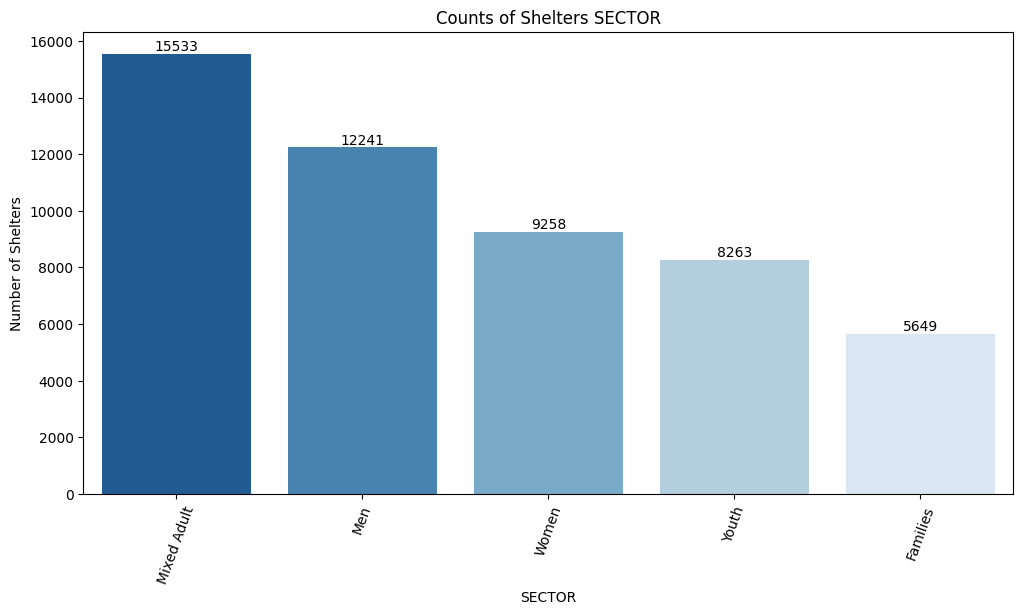

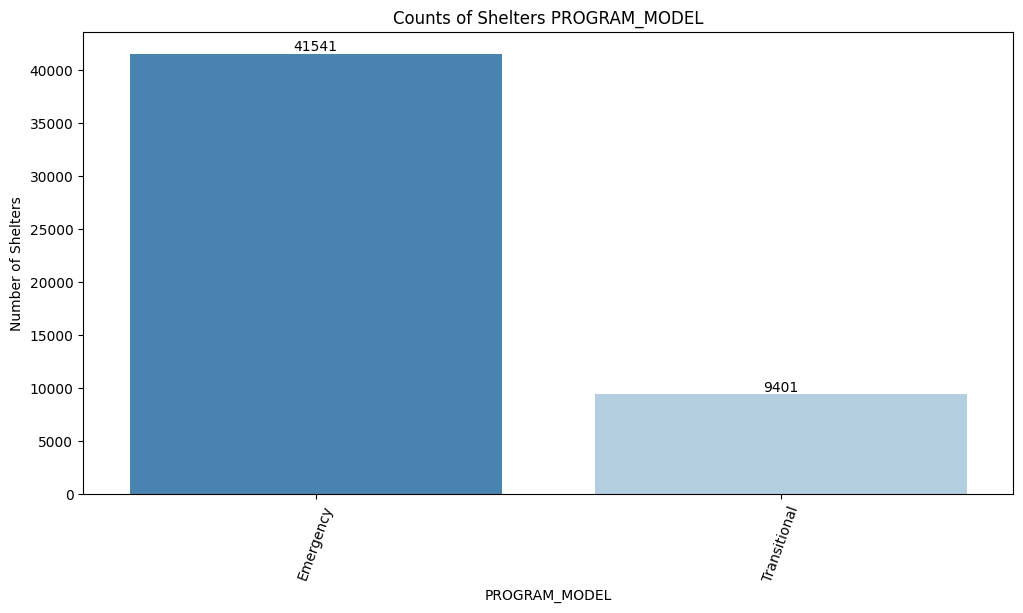

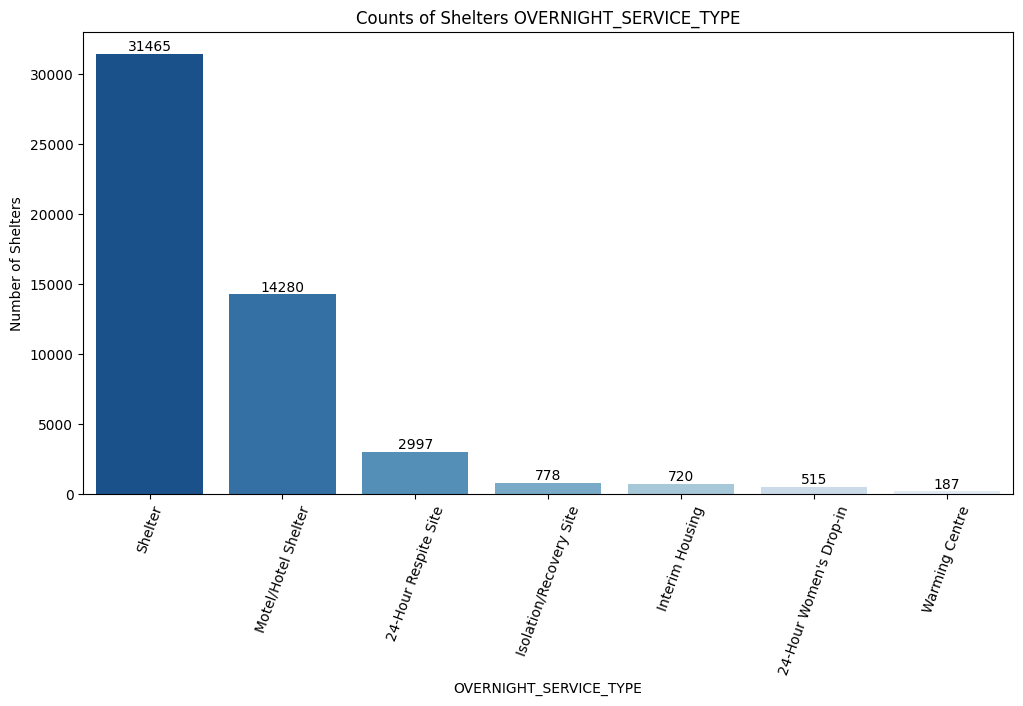

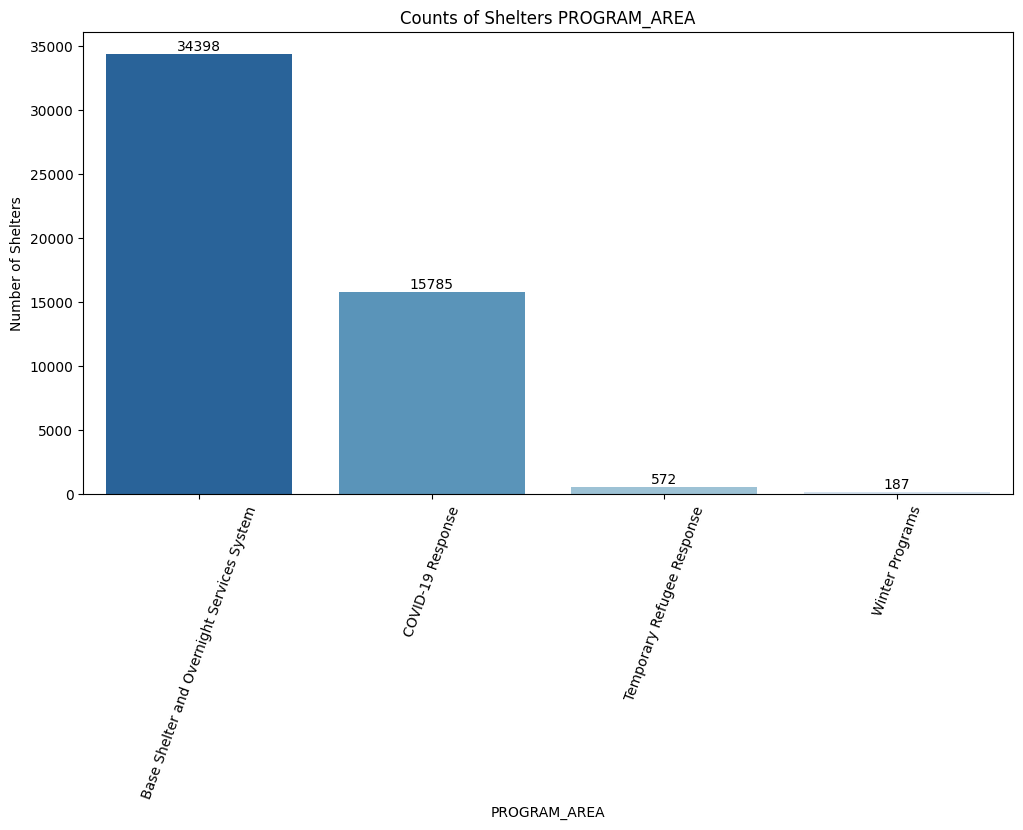

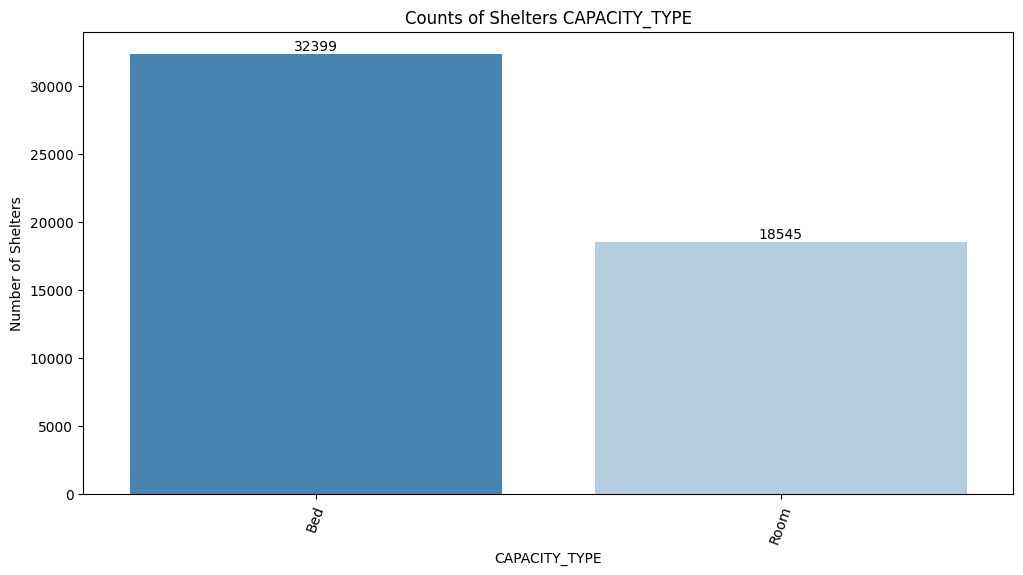

In [ ]:
# Count and visualize the distribution of class for categorical variables
for column in ['SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA','CAPACITY_TYPE']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)
    df_column[column] = df_column[column].astype(str)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    pal = sns.color_palette("Blues_r", len(df_column))
    bars = sns.barplot(x=df_column[column], y=df_column['Count'], palette = pal, ax=ax)

    plt.xticks(rotation=70)
    plt.title(f'Counts of Shelters {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Shelters')

    # Label each bar with its value count
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2.,
                bar.get_height(),
                f'{int(bar.get_height())}',
                ha='center', va='bottom',
                color='black')

    # Display the plot
    plt.show()

Looks like the missing data is from the different capacity types. Let's create a new variable OCCUPANCY RATE to confirm this.

In [ ]:
# To study the trend of shelter occupancy, let's create a new OCCUPANCY MONTH column
df['MONTH'] = df['OCCUPANCY_DATE'].dt.month
df['DAY'] = df['OCCUPANCY_DATE'].dt.day

# Let's check on the dataset
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,ACTUAL_BEDS,OCCUPIED_BEDS,ACTUAL_ROOMS,OCCUPIED_ROOMS,OCCUPANCY_RATE,MONTH,DAY
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room,NaN,NaN,29.0,26.0,89.66,1,1
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room,NaN,NaN,3.0,3.0,100.00,1,1
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room,NaN,NaN,28.0,23.0,82.14,1,1
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room,NaN,NaN,17.0,17.0,100.00,1,1
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room,NaN,NaN,14.0,13.0,92.86,1,1


For this analysis, let's focus on some columns and remove the others to reduce data dimensionality.

In [ ]:
# Create new df with select columns
df1 = df[['SECTOR','OCCUPANCY_DATE','PROGRAM_MODEL','SERVICE_USER_COUNT', 'CAPACITY_TYPE', 'OCCUPANCY_RATE','MONTH','DAY']]

In [ ]:
df1.head()

,SECTOR,OCCUPANCY_DATE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,OCCUPANCY_RATE,MONTH,DAY
0,Families,2021-01-01,Emergency,74,Room,89.66,1,1
1,Mixed Adult,2021-01-01,Emergency,3,Room,100.00,1,1
2,Men,2021-01-01,Emergency,24,Room,82.14,1,1
3,Mixed Adult,2021-01-01,Emergency,25,Room,100.00,1,1
4,Women,2021-01-01,Emergency,13,Room,92.86,1,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SECTOR              50944 non-null  object        
 1   OCCUPANCY_DATE      50944 non-null  datetime64[ns]
 2   PROGRAM_MODEL       50942 non-null  object        
 3   SERVICE_USER_COUNT  50944 non-null  int64         
 4   CAPACITY_TYPE       50944 non-null  object        
 5   OCCUPANCY_RATE      50944 non-null  float64       
 6   MONTH               50944 non-null  int64         
 7   DAY                 50944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.1+ MB


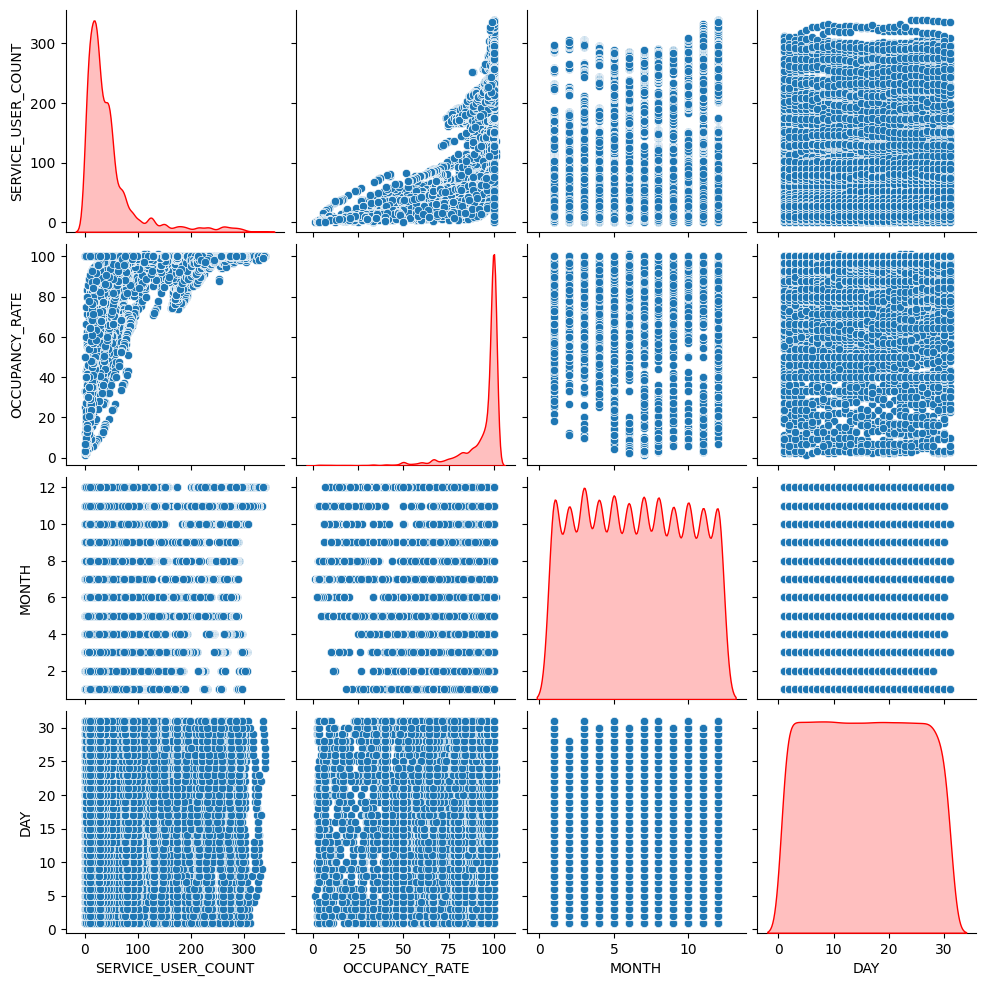

In [ ]:
sns.pairplot(df1,diag_kind = "kde",diag_kws={"color":"red"})

We can see that both numerical varibles have skewed distribution and a significant amount of outliers.

- A possible next step would be to use transformation to mitigate the skewness of variables

Instead of visualizing their distributions using boxplots, let's visualize occupancy rate over time.

In [ ]:
# Let's get some summary stats of occupancy rate
df1['OCCUPANCY_RATE'].describe()

count    50944.000000
mean        93.014233
std         13.878780
min          1.200000
25%         92.310000
50%        100.000000
75%        100.000000
max        101.410000
Name: OCCUPANCY_RATE, dtype: float64

We can see over 50% of the shelters are at capacity. Some are over capacity.

In [ ]:
# Dsitribution of shelters at capacity
at_capacity = df1[df1['OCCUPANCY_RATE'] == 100.0]
over_capacity = df1[df1['OCCUPANCY_RATE'] > 100.0]

# Check over capacity shelters
over_capacity

,SECTOR,OCCUPANCY_DATE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,OCCUPANCY_RATE,MONTH,DAY
23013,Mixed Adult,2021-06-11,Emergency,137,Room,101.27,6,11
24536,Mixed Adult,2021-06-22,Emergency,115,Room,101.41,6,22
24675,Mixed Adult,2021-06-23,Emergency,117,Room,101.37,6,23
24814,Mixed Adult,2021-06-24,Emergency,111,Room,101.41,6,24


Only four shelters are over capacity. Let's focus on shelters at capacity for now.

- Which sectors are at capacity? What program models? What capacity type?

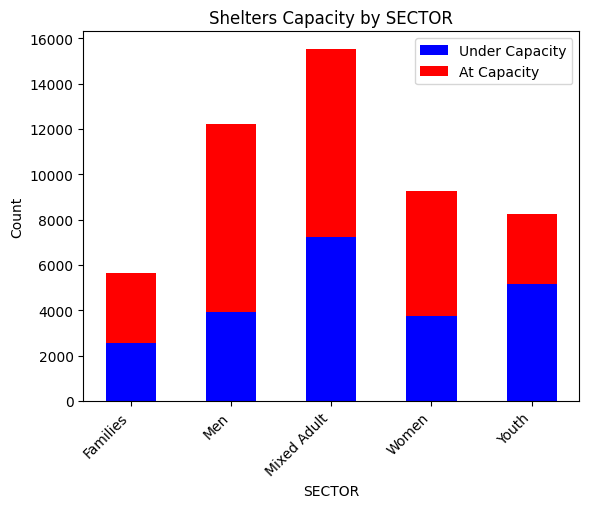

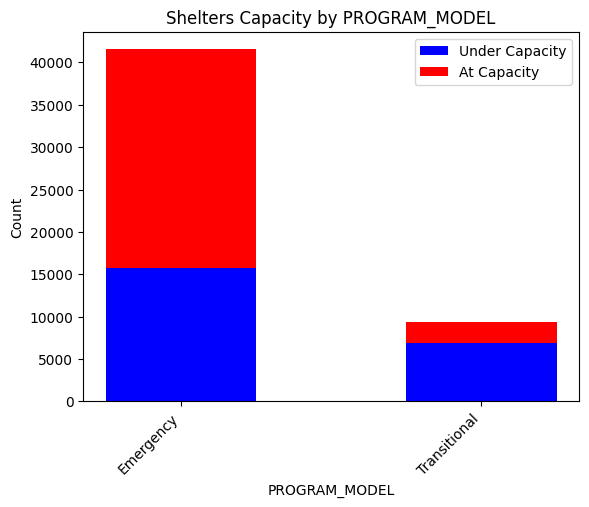

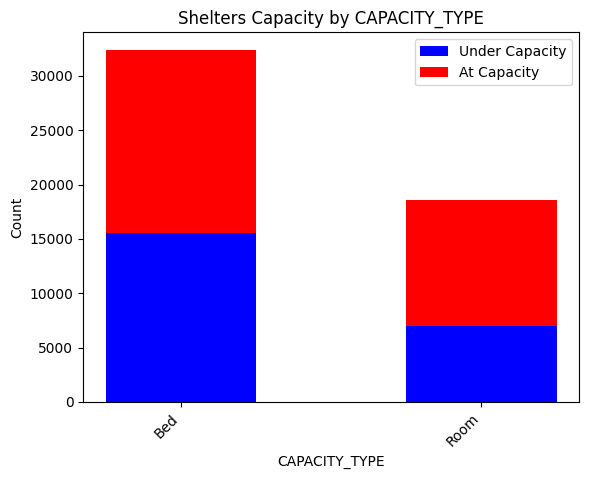

In [ ]:
for col in ['SECTOR','PROGRAM_MODEL','CAPACITY_TYPE']:

  groups = df1[col].unique()

  # Create a DataFrame with the counts of shelters in each group
  group_counts = df1.groupby([col, df1['OCCUPANCY_RATE'] >= 100.0]).size().unstack(fill_value=0)

  # Define colors for the bars
  colors = ['blue', 'red']

  # Define sector labels and positions
  groups = group_counts.index
  positions = np.arange(len(groups))

  # Create the stacked bar chart
  fig, ax = plt.subplots()
  for i, color in enumerate(colors):
      plt.bar(
          positions,
          group_counts.iloc[:, i],
          bottom=np.sum(group_counts.iloc[:, :i], axis=1),
          label='Under Capacity' if i == 0 else 'At Capacity',
          color=color,
          width=0.5,
      )

  # Customize the plot
  ax.set_title(f'Shelters Capacity by {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Count')
  ax.set_xticks(positions)
  ax.set_xticklabels(groups, rotation=45, ha="right")
  ax.legend()


We can see that around 2/3 of emergency shelters are at capacity, while only about a quarter of transitonal shelters are at capacity.

Is this trend consistent throughout the year?

In [ ]:
df1['AT_CAPACITY'] = df1['OCCUPANCY_RATE'] >= 100.0

# Create a pivot table
pivot_table = pd.pivot_table(
    df1,
    index=['MONTH', 'PROGRAM_MODEL'],
    columns='AT_CAPACITY',
    values='SECTOR',
    aggfunc='count',
    fill_value=0
)

# Rename columns for clarity
pivot_table.columns = ['Not At Capacity', 'At Capacity']

# Reset the index for a cleaner representation
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)

    MONTH PROGRAM_MODEL  Not At Capacity  At Capacity
0       1     Emergency             1385         2181
1       1  Transitional              591          252
2       2     Emergency             1131         2164
3       2  Transitional              556          227
4       3     Emergency             1277         2409
5       3  Transitional              590          259
6       4     Emergency             1246         2208
7       4  Transitional              610          168
8       5     Emergency             1560         1987
9       5  Transitional              643          162
10      6     Emergency             1703         1693
11      6  Transitional              553          214
12      7     Emergency             1637         1890
13      7  Transitional              612          178
14      8     Emergency             1502         2031
15      8  Transitional              560          211
16      9     Emergency             1219         2140
17      9  Transitional     

<Axes: xlabel='MONTH,PROGRAM_MODEL'>

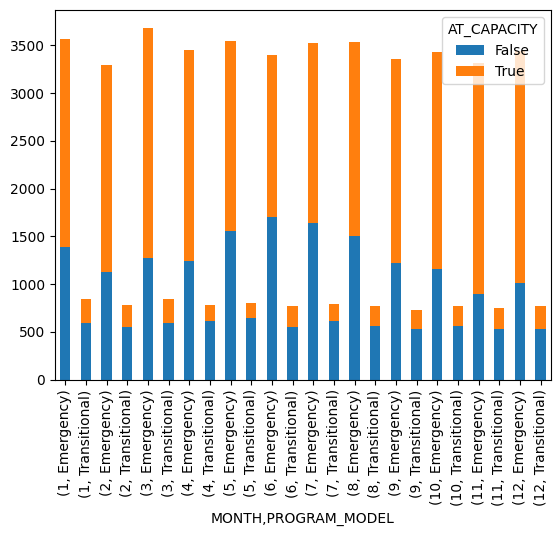

In [ ]:
# Visualize at capacity trends by program model throughout the year
df1.groupby(['MONTH', 'AT_CAPACITY'])['PROGRAM_MODEL']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

We can see approximately half of emergency shelters are consistently at capacity throughout 2021, compared to only around a quarter of transitonal shelters are at capacity over the months. This might indicate an increased demand for emergency shelter placements.

In [ ]:
# df1['AT_CAPACITY'] = df1['OCCUPANCY_RATE'] >= 100.0
# # Group by 'PROGRAM_MODEL' and 'Month', calculate the mean OCCUPANCY_RATE, and unstack the data
# df1.groupby([pd.Grouper(key='OCCUPANCY_DATE', freq='M'), 'PROGRAM_MODEL', df1['AT_CAPACITY']]).size().unstack(fill_value=0)

### Occupancy rate overview

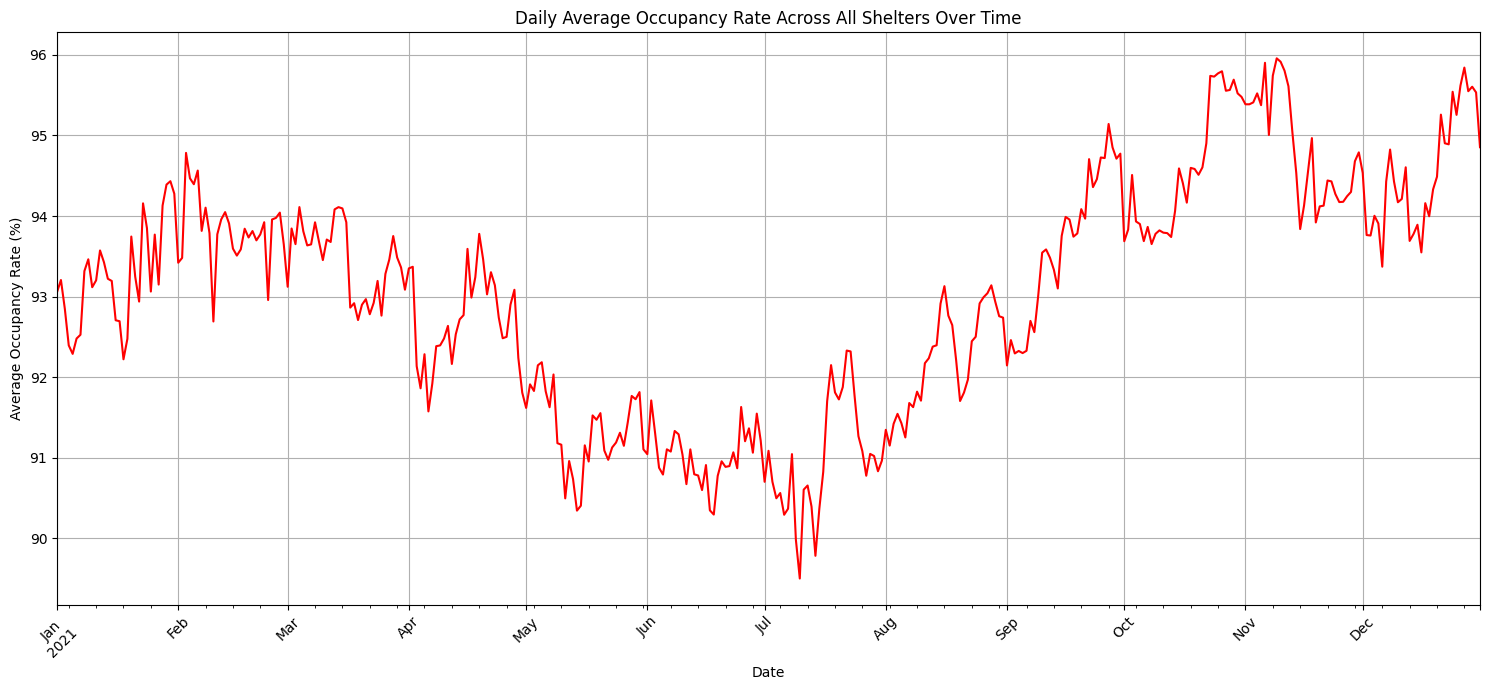

In [ ]:
# Occupancy rate across all shelters over time

# Group by occupancy date and calculate daily average occupancy rate
daily_avg_occupancy_rate = df1.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE'].mean()

# plot daily average occupancy rate over time
plt.figure(figsize=(15, 7))
daily_avg_occupancy_rate.plot(kind='line', color='red')
plt.title('Daily Average Occupancy Rate Across All Shelters Over Time')
plt.xlabel('Date')
plt.ylabel('Average Occupancy Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There appears to be a seasonal trend, with occupancy rates fluctuating periodically. The rate tends to dip around the mid-year before rising again, suggesting a possible correlation with seasonal factors that influence homelessness, like weather conditions.

- The chart shows peaks and troughs in occupancy rates. The peaks might reflect periods when demand for shelter increases, which could be due to colder weather, economic downturns, or other social factors. Conversely, the troughs suggest times when the demand decreases, which could be related to warmer weather or improvements in housing availability or social programs.

- There is an overall increasing trend in occupancy rates towards the end of the year. This could indicate that shelters are experiencing greater demand as the weather becomes colder or due to holiday-related factors.

- The variability within short periods indicates day-to-day changes in shelter usage, possibly influenced by immediate factors such as short-term weather events, availability of alternative housing options, or temporary policy changes.

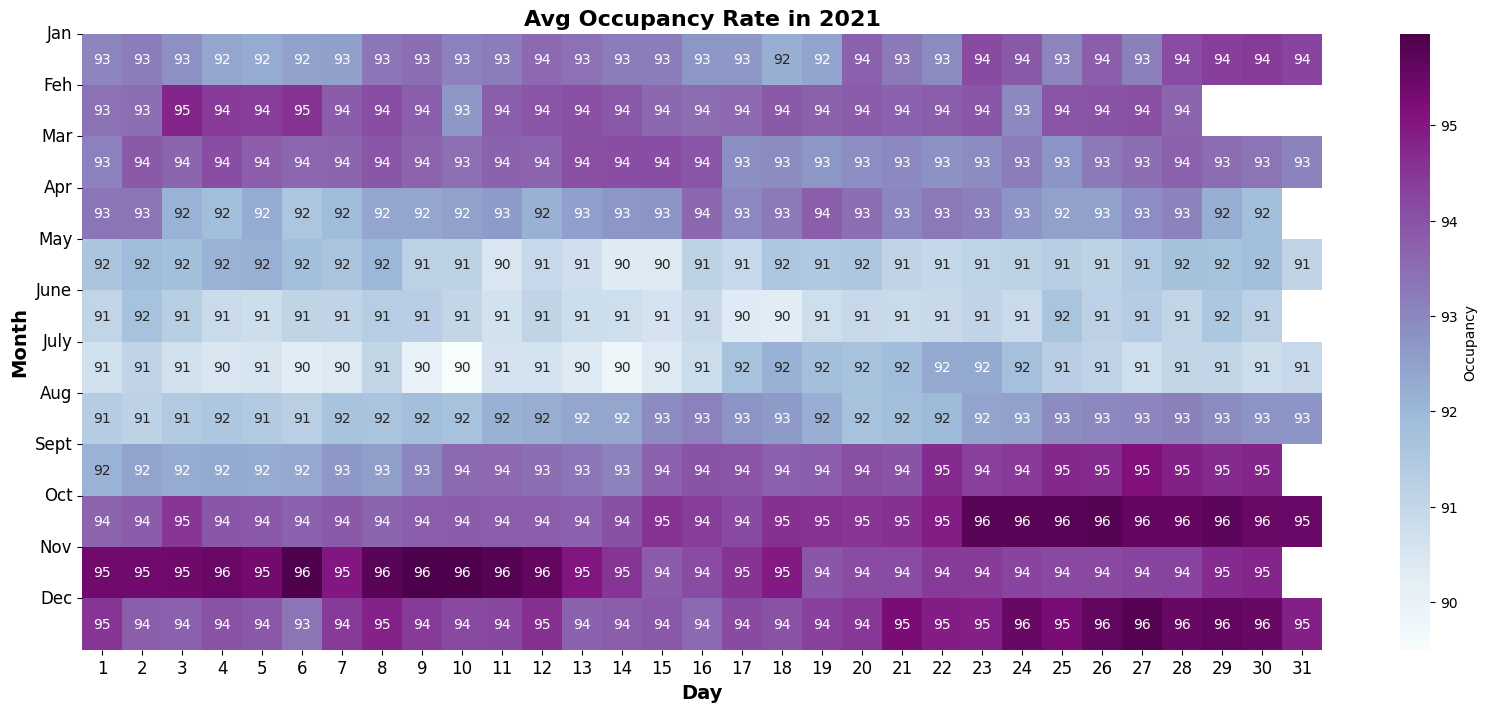

In [ ]:
avg_occupancy_by_day_month = df1.groupby(['MONTH', 'DAY'])['OCCUPANCY_RATE'].mean().reset_index()

heatmap_data = avg_occupancy_by_day_month.pivot('MONTH', 'DAY', 'OCCUPANCY_RATE')

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap='BuPu', annot=True, fmt=".0f", cbar_kws={'label': 'Occupancy'})
plt.title('Avg Occupancy Rate in 2021', fontsize=16, fontweight="bold")
plt.xlabel('Day', fontsize=14, fontweight='bold')
plt.ylabel('Month', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)  # Set the fontsize directly for Y-axis labels
plt.yticks(ticks=range(12), labels=['Jan', 'Feh', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show()

Monthly Occupancy Rate by Types of Shelter

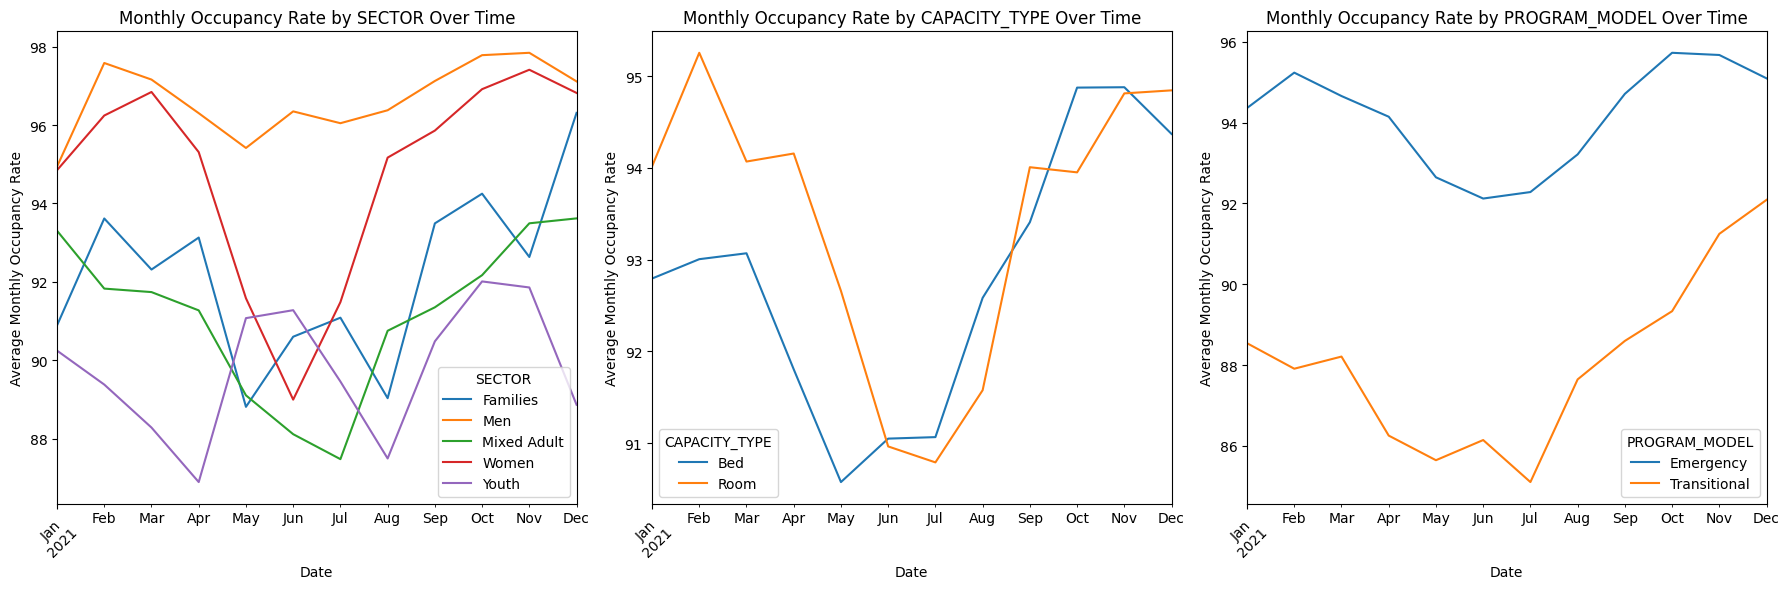

In [ ]:
# Function to visualize occupancy rate trends by variable over time
def monthly_occupancy_trend(variables, df):
    plt.figure(figsize=(18, 6))

    for i, col in enumerate(variables, 1):
        plt.subplot(1, len(variables), i)
        df.groupby([col, pd.Grouper(key='OCCUPANCY_DATE', freq='M')])['OCCUPANCY_RATE'].mean().unstack(0).plot(ax=plt.gca())
        plt.title(f'Monthly Occupancy Rate by {col} Over Time')
        plt.ylabel('Average Monthly Occupancy Rate')
        plt.xlabel('Date')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Call the function
monthly_occupancy_trend(['SECTOR', 'CAPACITY_TYPE', 'PROGRAM_MODEL'], df1)

- There are consistent seasonal trends in shelter occupancy rates across sectors, capacity types and program models: decreased occupancy in the summer and increased occupancy in the winter.

-  Men shelters have a consistently high occupancy rate throughout the year, suggesting a persistent need for men accommodations.

- Women shelters show the most significant decrease in occupancy during the summer months. Mixed adult shelters have a similar pattern with a less significant change.

- Youth shelter occupancy rates show the most inconsistent seasonal pattern when compared to the rest of the shelters, with decreased occupancy in Jan-April and Jun-August, and a rise in occupancy between April-May and August-October.

- Room based shelters and bed based shelters show similar trends throughout the year with a significant decrease during summer months and significant increase for winter months. However, room based shelters are consistently more utilized than bed based shelters for the first half of the year.

- Emergency shelters have significantly highgher occupancy rate than transitional shelters throughout the year, which could be a reflection the effectiveness of emergency shelters or increasing needs of emergency shelters.

### Room vs Bed based Shelters

In [ ]:
# Define function to create new dataframes for room-based and bed-based shelters

def subset_df(col,group,df):

  subsetdf = df[df[col] == group]

  return subsetdf

# Call funtion

room_shelters = subset_df('CAPACITY_TYPE', 'Room', df1)
bed_shelters = subset_df('CAPACITY_TYPE', 'Bed', df1)

In [ ]:
# Define function to get summary statistics

def get_summary_statistics(dataset):

  mean = np.round(np.mean(dataset), 2)
  median = np.round(np.median(dataset), 2)
  min_value = np.round(dataset.min(), 2)
  max_value = np.round(dataset.max(), 2)
  quartile_1 = np.round(dataset.quantile(0.25), 2)
  quartile_3 = np.round(dataset.quantile(0.75), 2)

  # Interquartile range
  iqr = np.round(quartile_3 - quartile_1, 2)

  print('Min: %s' % min_value)
  print('Mean: %s' % mean)
  print('Max: %s' % max_value)
  print('25th percentile: %s' % quartile_1)
  print('Median: %s' % median)
  print('75th percentile: %s' % quartile_3)
  print('Interquartile range (IQR): %s' % iqr)

In [ ]:
# Call function for room-based shelters
print('\nRoom-based Shelter Occupancy Rate Summary Statistics\n')
get_summary_statistics(room_shelters['OCCUPANCY_RATE'])


Room-based Shelter Occupancy Rate Summary Statistics

Min: 1.2
Mean: 93.41
Max: 101.41
25th percentile: 95.83
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 4.17


In [ ]:
# Call function for bed-based shelters
print('\nBed-based Shelter Occupancy Rate Summary Statistics\n')
get_summary_statistics(bed_shelters['OCCUPANCY_RATE'])


Bed-based Shelter Occupancy Rate Summary Statistics

Min: 2.27
Mean: 92.79
Max: 100.0
25th percentile: 90.0
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 10.0


In [ ]:
# Visualize occupancy rate distribution by variable

def explore_feature_distribution(x,y):

  # sort the boxes using group occupancy rate mean in ascending order
  index_sort = df1.groupby(x)[y].mean().sort_values().index

  # due to skewness, create boxplot with whis = 3 for less aggressive outlier detection
  sns.boxplot(data = df1, x = x, y = y, hue = x, whis = 3, medianprops={'color': 'red'}, order=index_sort)


  plt.title(f'Distribution of {y} by {x}')
  plt.xlabel(x)
  plt.ylabel(y)

  plt.tight_layout()

  plt.show()


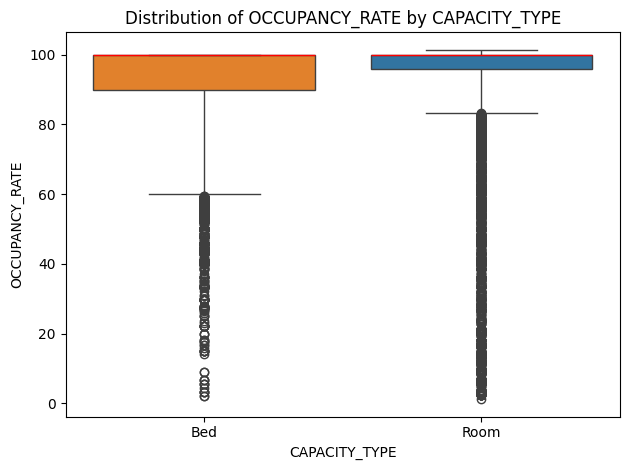

In [ ]:
explore_feature_distribution('CAPACITY_TYPE','OCCUPANCY_RATE')

In [ ]:
df1['CAPACITY_TYPE'].value_counts()

Bed     32399
Room    18545
Name: CAPACITY_TYPE, dtype: int64

In [ ]:
# Perform Welch's t-test to compare mean occupancy rate for room-based vs bed-based shelters
from scipy.stats import ttest_ind

t_stat, p_value = stats.ttest_ind(room_shelters['OCCUPANCY_RATE'], bed_shelters['OCCUPANCY_RATE'], equal_var=False)

# Print the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average occupancy rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average occupancy rates.")

t-statistic: 4.498433311873296
p-value: 6.870753592376028e-06
Reject the null hypothesis: There is a significant difference in average occupancy rates.


However, since we can see that distributions of occupancy rate are not normal, this does not satisfy one of the assumption for t-test. To make sure our results are accurate, let's draw random samples from each groups.

According to Central Limit Theorem, when taking sufficiently large random samples from a population (even if the population itself is not normally distributed), the distribution of the sample means will follow a normal distribution.

We can then apply t-tests on sample mean, assuming a normal distribution.



In [ ]:
# Welch's t-test to compare average occupancy rate for room-based and bed based samples
from scipy.stats import ttest_ind
# Define the number of samples and sample size

num_samples = 10  # Number of samples to take from each group
sample_size = 30  # Size of each individual sample

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Sample_Group', 'Sample_Number', 'Sample_Mean'])

# Perform the sampling and calculate means
for group_name, group_df in [('Room', room_shelters), ('Bed', bed_shelters)]:
    for i in range(num_samples):
        # Randomly select samples of the specified size
        sample = group_df['OCCUPANCY_RATE'].sample(n=sample_size, random_state=i)

        # Calculate the mean of the sample
        sample_mean = np.mean(sample)

        # Append the results to the DataFrame
        results = results.append({'Sample_Group': group_name, 'Sample_Number': i+1, 'Sample_Mean': sample_mean}, ignore_index=True)

# Perform t-tests to compare means between the two groups
room_samples = results[results['Sample_Group'] == 'Room']['Sample_Mean']
bed_samples = results[results['Sample_Group'] == 'Bed']['Sample_Mean']

t_stat, p_val = ttest_ind(room_samples, bed_samples, equal_var=False)

# Print the t-test results
print("T-statistic =", t_stat)
print("P-value =", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean occupancy rates between room-based and bed-based shelters based on the samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean occupancy rates between room-based and bed-based shelters based on the samples.")

T-statistic = 0.9027510778385237
P-value = 0.3802578572682228
Fail to reject the null hypothesis: There is no significant difference in mean occupancy rates between room-based and bed-based shelters based on the samples.


In [ ]:
room_shelters

,SECTOR,OCCUPANCY_DATE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,OCCUPANCY_RATE,MONTH,DAY,AT_CAPACITY
0,Families,2021-01-01,Emergency,74,Room,89.66,1,1,False
1,Mixed Adult,2021-01-01,Emergency,3,Room,100.00,1,1,True
2,Men,2021-01-01,Emergency,24,Room,82.14,1,1,False
3,Mixed Adult,2021-01-01,Emergency,25,Room,100.00,1,1,True
4,Women,2021-01-01,Emergency,13,Room,92.86,1,1,False
...,...,...,...,...,...,...,...,...,...
50920,Men,2021-12-31,Emergency,128,Room,100.00,12,31,True
50923,Men,2021-12-31,Emergency,76,Room,100.00,12,31,True
50927,Families,2021-12-31,Emergency,10,Room,100.00,12,31,True
50932,Families,2021-12-31,Emergency,74,Room,95.65,12,31,False


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have room_shelters and bed_shelters DataFrames with 'OCCUPANCY_DATE' and 'OCCUPANCY_RATE' columns

# # Convert 'OCCUPANCY_DATE' to month-year format
# room_shelters['Month'] = room_shelters['OCCUPANCY_DATE'].dt.to_period('M')
# bed_shelters['Month'] = bed_shelters['OCCUPANCY_DATE'].dt.to_period('M')

# Group the data by month and calculate mean occupancy rates
room_monthly_means = room_shelters.groupby('MONTH')['OCCUPANCY_RATE'].mean()
bed_monthly_means = bed_shelters.groupby('MONTH')['OCCUPANCY_RATE'].mean()

# Create a DataFrame to store the results
monthly_comparison = pd.DataFrame({'Room-Based': room_monthly_means, 'Bed-Based': bed_monthly_means})

# Perform statistical tests for each month (e.g., Welch's t-test)
results = []

for month in monthly_comparison.index:
    room_data = room_shelters[room_shelters['MONTH'] == month]['OCCUPANCY_RATE']
    bed_data = bed_shelters[bed_shelters['MONTH'] == month]['OCCUPANCY_RATE']

    t_stat, p_val = ttest_ind(room_data, bed_data, equal_var=False)

    results.append({'Month': month, 'T-Statistic': t_stat, 'P-Value': p_val, 'Sig_Difference': p_val < 0.05})

# Create a DataFrame to store the test results
test_results = pd.DataFrame(results)

# Print the test results or perform further analysis
print(test_results)

    Month  T-Statistic       P-Value  Sig_Difference
0       1     3.226458  1.266316e-03            True
1       2     6.153925  8.458835e-10            True
2       3     2.566541  1.031512e-02            True
3       4     5.742403  1.015344e-08            True
4       5     4.136025  3.633055e-05            True
5       6    -0.149352  8.812884e-01           False
6       7    -0.465181  6.418441e-01           False
7       8    -1.855582  6.364382e-02           False
8       9     1.236424  2.164294e-01           False
9      10    -1.908397  5.648972e-02           False
10     11    -0.138251  8.900554e-01           False
11     12     1.041088  2.979351e-01           False


The results again show that there is significant difference between occupancy rates between room-based shelters and bed-based shelters for ealy months of 2021.

In [ ]:
# To confirm this results, let's repeat our method and draw random samples from both groups

# Define the number of samples and sample size for each month
num_samples = 10  # Number of samples to take from each group for each month
sample_size = 30  # Size of each individual sample

# Create an empty DataFrame to store the results
monthly_results = pd.DataFrame(columns=['Month', 'T-Statistic', 'P-Value', 'Sig_Difference'])

# Perform sampling and statistical tests for each month
for month in room_shelters['MONTH'].unique():
    room_data = room_shelters[room_shelters['MONTH'] == month]['OCCUPANCY_RATE']
    bed_data = bed_shelters[bed_shelters['MONTH'] == month]['OCCUPANCY_RATE']

    # Perform sampling and calculate means for each group (room-based and bed-based)
    room_sample_means = []
    bed_sample_means = []

    for _ in range(num_samples):
        room_sample = room_data.sample(n=sample_size, random_state=_)
        bed_sample = bed_data.sample(n=sample_size, random_state=_)

        room_sample_means.append(np.mean(room_sample))
        bed_sample_means.append(np.mean(bed_sample))

    # Perform statistical test (e.g., Welch's t-test) on the sample means
    t_stat, p_val = ttest_ind(room_sample_means, bed_sample_means, equal_var=False)

    # Determine if we can reject the null hypothesis
    alpha = 0.05  # Set your significance level
    reject_null_hypothesis = p_val < alpha

    # Append the results to the DataFrame
    monthly_results = monthly_results.append({
        'Month': month,
        'T-Statistic': t_stat,
        'P-Value': p_val,
        'Sig_Difference': reject_null_hypothesis,
    }, ignore_index=True)

# Print the test results for each month
print(monthly_results)

   Month  T-Statistic   P-Value Sig_Difference
0      1     0.610515  0.549273          False
1      2     2.880021  0.009973           True
2      3     0.366488  0.719084          False
3      4     2.679568  0.015346           True
4      5     2.378941  0.028936           True
5      6    -0.803772  0.432037          False
6      7    -0.464585  0.650431          False
7      8    -0.245977  0.809384          False
8      9     0.012436  0.990217          False
9     10    -0.519010  0.611003          False
10    11    -2.203183  0.048072           True
11    12     0.518005  0.611263          False


Here, we can see a monthly breakdown of average occupancy rate comparison between room-based and bed-based shelters.


### Gender-based vs Co-ed Shelters

Let's see if there are significant differences between mean occupancy rates for gener-based shelters and co-ed shelters.

In [ ]:
# Create a new column for gender type
conditions = [
    (df1['SECTOR'] == 'Women') | (df1['SECTOR'] == 'Men'),
    (df1['SECTOR'] == 'Mixed Adult') | (df1['SECTOR'] == 'Youth') | (df1['SECTOR'] == 'Families')
]

values = ['Gendered', 'Co-ed']

# Create the 'GENDER_TYPE' column based on conditions
df1['GENDER_TYPE'] = np.select(conditions, values, default=None)

In [ ]:
# Create dataframes for genered vs co-ed shelters
gendered_shelters =  df1[df1['GENDER_TYPE'] == 'Co-ed']
coed_shelters = df1[df1['GENDER_TYPE'] == 'Gendered']

In [ ]:
# Check distribution of genered vs co-ed shelters
(len(gendered_shelters),len(coed_shelters))

(29445, 21499)

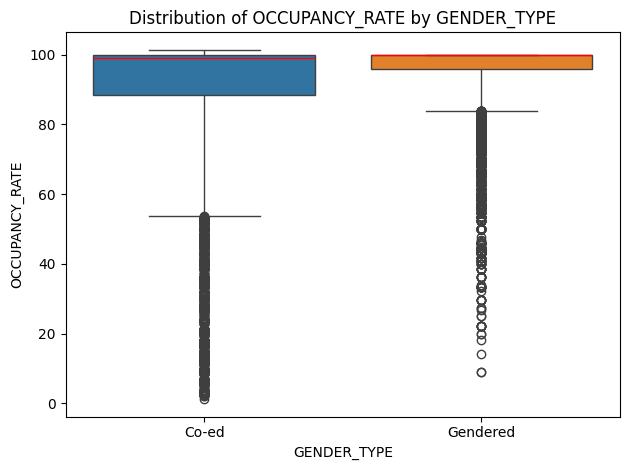

In [ ]:
# Visualize occupancy rate distribution for gendered vs co-ed shelters
explore_feature_distribution('GENDER_TYPE','OCCUPANCY_RATE')

In [ ]:
# Generate summary statistics for more details

print('\nGender-based Shelter Occupancy Rate Summary Statistics\n')
get_summary_statistics(gendered_shelters['OCCUPANCY_RATE'])

print('\nCo-ed Shelter Occupancy Rate Summary Statistics\n')
get_summary_statistics(coed_shelters['OCCUPANCY_RATE'])


Gender-based Shelter Occupancy Rate Summary Statistics

Min: 1.2
Mean: 90.98
Max: 101.41
25th percentile: 88.46
Median: 99.19
75th percentile: 100.0
Interquartile range (IQR): 11.54

Co-ed Shelter Occupancy Rate Summary Statistics

Min: 9.09
Mean: 95.81
Max: 100.0
25th percentile: 96.0
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 4.0


Since the distribution of occupancy rate for gender-based and co-ed shelters are again not approximately normal, let's jump straight to testing random samples for t-test.

In [ ]:
# Welch's t-test to compare average occupancy rate for gender-based and co-ed samples
# Define the number of samples and sample size

num_samples = 10  # Number of samples to take from each group
sample_size = 30  # Size of each individual sample

# Reset empty DataFrame to store the results
results = pd.DataFrame(columns=['Sample_Group', 'Sample_Number', 'Sample_Mean'])

# Perform the sampling and calculate means
for group_name, group_df in [('Gendered', gendered_shelters), ('Co-ed', coed_shelters)]:
    for i in range(num_samples):
        # Randomly select samples of the specified size
        sample = group_df['OCCUPANCY_RATE'].sample(n=sample_size, random_state=i)

        # Calculate the mean of the sample
        sample_mean = np.mean(sample)

        # Append the results to the DataFrame
        results = results.append({'Sample_Group': group_name, 'Sample_Number': i+1, 'Sample_Mean': sample_mean}, ignore_index=True)

# Perform t-tests to compare means between the two groups
gendered_samples = results[results['Sample_Group'] == 'Gendered']['Sample_Mean']
coed_samples = results[results['Sample_Group'] == 'Co-ed']['Sample_Mean']

t_stat, p_val = ttest_ind(coed_samples, gendered_samples, equal_var=False)

# Divide the p-value by 2 for a one-tailed test
p_val /= 2

# Print the one-tailed t-test results
print("T-statistic =", t_stat)
print("P-value (one-tailed) =", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis.")
    if t_stat > 0:
      print("The mean occupancy rate of co-ed shelters is significantly greater than the mean of gender-based shelters based on the samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the mean occupancy rate of co-ed shelters is greater than the mean of gender-based shelters based on the samples.")

T-statistic = 4.974523241120851
P-value (one-tailed) = 6.365079175170184e-05
Reject the null hypothesis.
The mean occupancy rate of co-ed shelters is significantly greater than the mean of gender-based shelters based on the samples.


There is a significant difference in mean occupancy rates between gender-based and co-ed shelters based on the samples, with co-ed shelters having  higher occupancy rate.

Let's examine this difference by month.

In [ ]:
# Create an empty DataFrame to store the results
monthly_results = pd.DataFrame(columns=['Month', 'T-Statistic', 'P-Value', 'Sig_Difference'])

# Perform sampling and statistical tests for each month
for month in gendered_shelters['MONTH'].unique():
    gendered_data = gendered_shelters[gendered_shelters['MONTH'] == month]['OCCUPANCY_RATE']
    coed_data = coed_shelters[coed_shelters['MONTH'] == month]['OCCUPANCY_RATE']

    # Perform sampling and calculate means for each group (gendered-based and coed-based)
    gendered_sample_means = []
    coed_sample_means = []

    for _ in range(num_samples):
        gendered_sample = gendered_data.sample(n=sample_size, random_state=_)
        coed_sample = coed_data.sample(n=sample_size, random_state=_)

        gendered_sample_means.append(np.mean(room_sample))
        coed_sample_means.append(np.mean(coed_sample))

    # Perform statistical test (e.g., Welch's t-test) on the sample means
    t_stat, p_val = ttest_ind(coed_sample_means, gendered_sample_means, equal_var=False)

    # Determine if we can reject the null hypothesis
    alpha = 0.05  # Set your significance level
    reject_null_hypothesis = p_val < alpha

    # Append the results to the DataFrame
    monthly_results = monthly_results.append({
        'Month': month,
        'T-Statistic': t_stat,
        'P-Value': p_val,
        'Sig_Difference': reject_null_hypothesis,
    }, ignore_index=True)

# Print the test results for each month
print(monthly_results)

   Month  T-Statistic   P-Value Sig_Difference
0      1    -4.914001  0.000831           True
1      2     3.210819  0.010645           True
2      3     1.983388  0.078630          False
3      4     0.688901  0.508254          False
4      5    -4.318462  0.001938           True
5      6    -4.746613  0.001049           True
6      7    -3.744731  0.004592           True
7      8    -2.388172  0.040679           True
8      9     0.522797  0.613740          False
9     10     3.696357  0.004948           True
10    11     4.597634  0.001295           True
11    12     3.897812  0.003631           True


Although overall co-ed shelters have higher mean occupancy rate, we can see from monthly breakdown that co-ed shelters have significantly higher monthly mean occupancy rate only during 4 months of 2021 (Feburary, and October - December) and a significantly lower monthly mean occupancy rate during  5 months of 2021 (January, May-August).

This is most likely due to the significant dip in occupancy rate in women's shelter during the summer months, which is significant enough that it dragged down mean occupancy rate of gender-based shelters for the year.

Let's look at the women's shelters more closely.

#### Women's Shelter

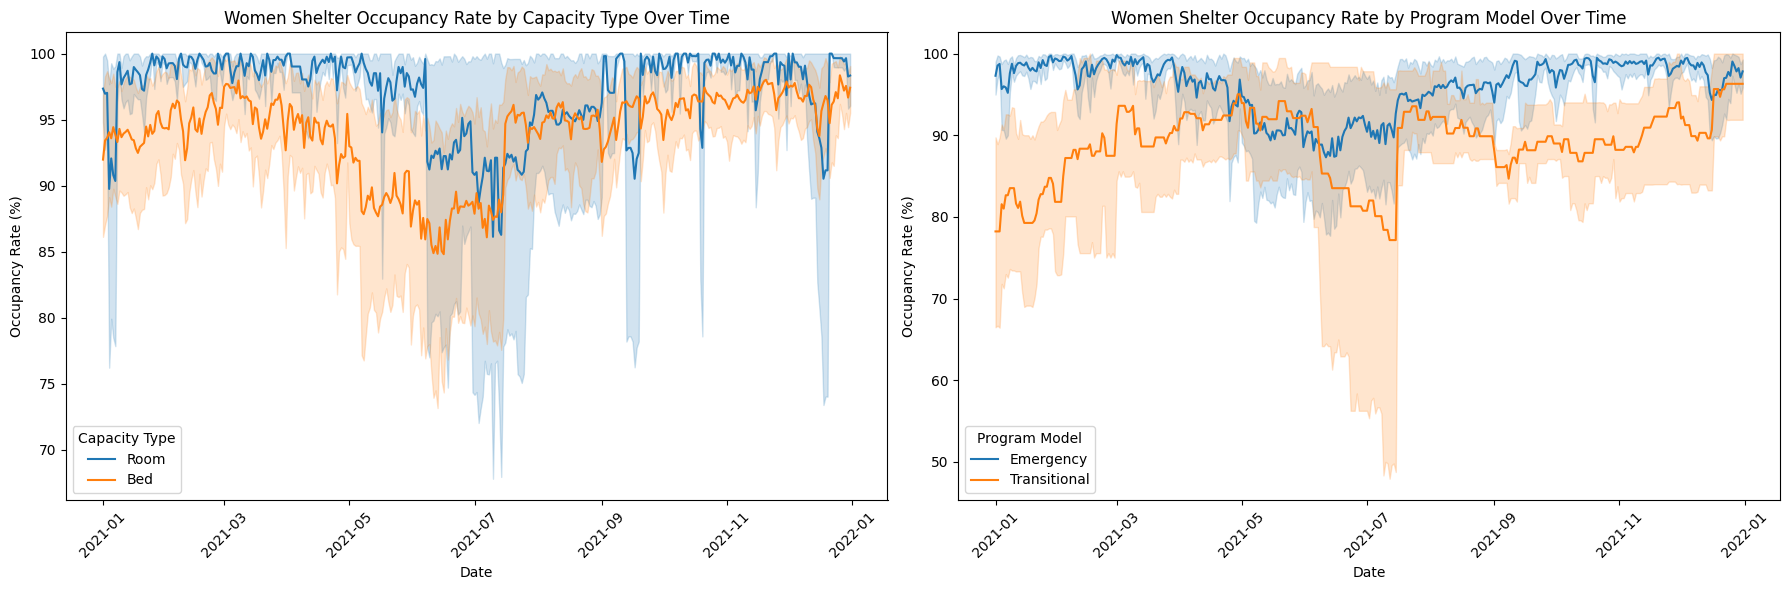

In [ ]:
# Filter the DataFrame for 'Women' sector
women_shelters = df1[df1['SECTOR'] == 'Women']

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot occupancy rate by capacity type for Women shelters
plt.subplot(1, 2, 1)
sns.lineplot(data=women_shelters, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', hue='CAPACITY_TYPE')
plt.title('Women Shelter Occupancy Rate by Capacity Type Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Capacity Type')
plt.xticks(rotation=45)

# Plot occupancy rate by program model for Women shelters
plt.subplot(1, 2, 2)
sns.lineplot(data=women_shelters, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', hue='PROGRAM_MODEL')
plt.title('Women Shelter Occupancy Rate by Program Model Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Program Model')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Although room-based women shelters have overall slightly higher occupancy rate than bed-based women shelter throughout the year, we can see there is a significant decrease in occupancy rate for room-based women shelters during the summer, down to around the same or even lower occupancy compared to bed-based women shelter during the warmer months. Similar patterns of lower occupancy rate exist for transitional women shelter.

#### Men's Shelter

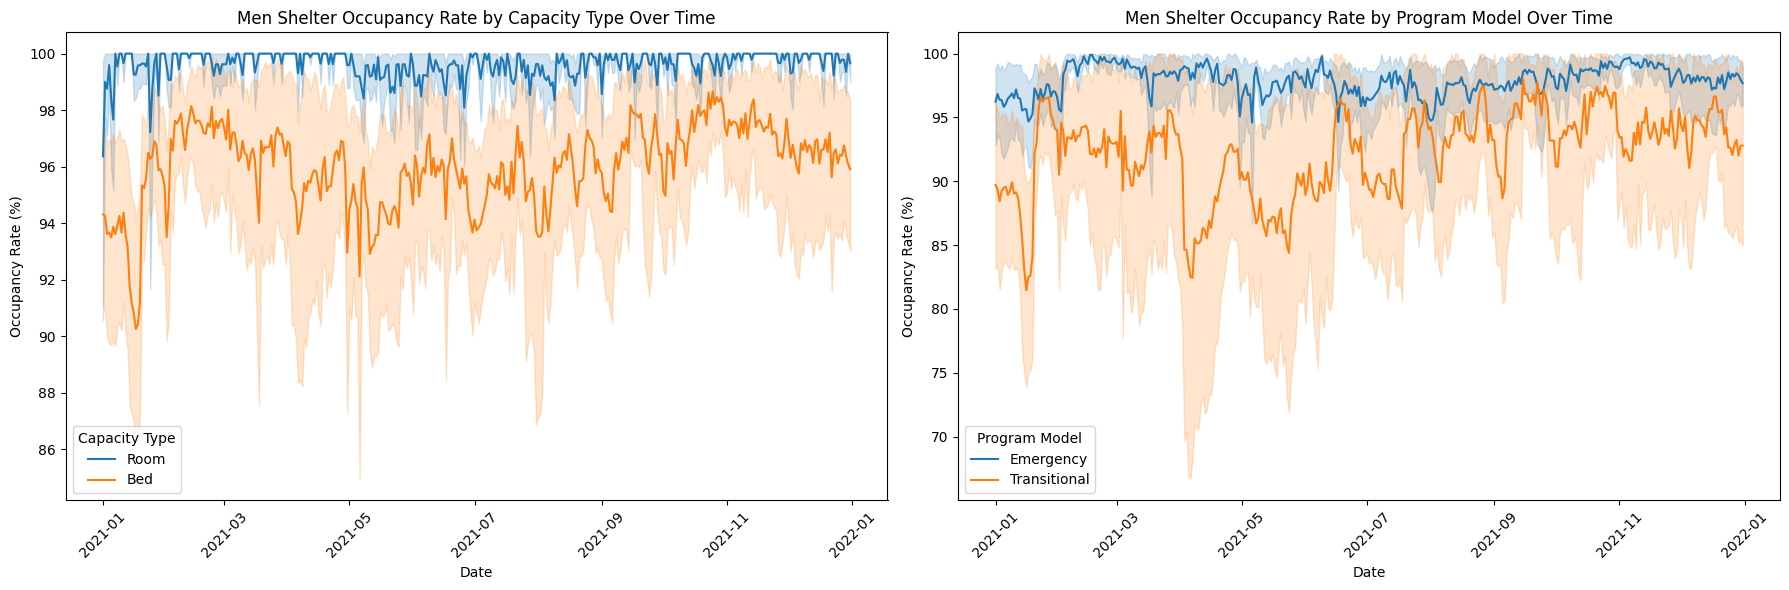

In [ ]:
men_shelters = df1[df1['SECTOR'] == 'Men']

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot occupancy rate by capacity type for Women shelters
plt.subplot(1, 2, 1)
sns.lineplot(data=men_shelters, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', hue='CAPACITY_TYPE')
plt.title('Men Shelter Occupancy Rate by Capacity Type Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Capacity Type')
plt.xticks(rotation=45)

# Plot occupancy rate by program model for Women shelters
plt.subplot(1, 2, 2)
sns.lineplot(data=men_shelters, x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', hue='PROGRAM_MODEL')
plt.title('Men Shelter Occupancy Rate by Program Model Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Program Model')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Further visualizations show a particularly steep decrease in room-based and transitional women’s shelters in the summer months, and a steady increase towards pre-summer occupancy levels right after.

These seasonal fluctuations are not observed in men’s shelter occupancy. For men's shelter, we can see a more significant gap between occupancy rates for room-based vs bed-based shelters witth similar trends over time.

Emergency men's shelters have consistently high occupancy rate throughout the year, while transitional men's shelters have quite volatile occupancy rates each month.

What does this seasonality in women's shelter occupancy rate mean? Why is there such a significant change in needs of accomodation for homeless women?

Further research on potential causes such as weather, job availability, and policy changes. It would also be informative to study the trends of women shelter occupancy rate spanning multiple years.

Given the distribution of occupancy is extremely skewed, the next step would be to apply transformation techniques and outlier detection techniques to better understand the structure of the dataset. Given the complexity of Toronto’s homelessness, introducing data on other socioeconomic factors, such as crime rate and job data, would uncover more dynamic ways Toronto shelters can plan and allocate shelter resources.


In [ ]:
# # Function to visualize daily occupancy rate trends by variable over time
# def daily_occupancy_trend(variables, df):
#     plt.figure(figsize=(18, 6))

#     for i, col in enumerate(variables, 1):
#         plt.subplot(1, len(variables), i)
#         df.groupby([col, pd.Grouper(key='OCCUPANCY_DATE', freq='D')])['OCCUPANCY_RATE'].mean().unstack(0).plot(ax=plt.gca())
#         plt.title(f'DailyOccupancy Rate by {col} Over Time')
#         plt.ylabel('Average Daily Occupancy Rate')
#         plt.xlabel('Date')
#         plt.xticks(rotation=45)
#         plt.tight_layout()

#     plt.show()

# # Call the function
# daily_occupancy_trend(['SECTOR', 'CAPACITY_TYPE', 'PROGRAM_MODEL'], df1)

In [ ]:
# # Visualize occupancy rate distribution by variable

# def explore_feature_distribution(x,y):

#   # sort the boxes using group occupancy rate mean in ascending order
#   index_sort = df1.groupby(x)[y].mean().sort_values().index

#   sns.boxplot(data = df1, x = x, y = y, hue = x, whis = 3, order=index_sort)


#   sns.boxplot(data = df1, x = x, y = y, hue = x, whis = 3)

#   plt.title(f'Distribution of {y} by {x}')
#   plt.xlabel(x)
#   plt.ylabel(y)

#   plt.tight_layout()

#   plt.show()
